#### ML - Homework 6 - Startup Success Prediction Solution

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# train_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/startup_data/training_set_label.csv" )
train_data  = pd.read_csv("training_set_label.csv" )
train_data.head()


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,01-01-07,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,01-01-00,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [3]:
train_data.shape

(923, 48)

In [4]:
file.shape

NameError: name 'file' is not defined

In [4]:
# test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/startup_data/testing_set_label.csv')
test_data = pd.read_csv('testing_set_label.csv')
test_data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,127,CT,41.321520,-72.929423,6511,c:14666,New Haven,NaN,REMOTV,02-10-2007,...,0,c:14666,0,1,1,1,0,0,1.3333,1
1,556,CA,37.452084,-122.112879,94303,c:31546,Palo Alto,NaN,Satiety,01-01-2000,...,1,c:31546,0,0,0,0,0,1,6.0000,1
2,812,NJ,40.296222,-74.050972,7724,c:46259,Eatontown,Eatontown NJ 7724,CebaTech,01-01-2004,...,0,c:46259,0,0,0,1,1,0,2.0000,0
3,106,CA,37.789268,-122.395184,94105,c:139,San Francisco,NaN,Swivel,12-01-2005,...,1,c:139,0,0,1,0,0,0,1.0000,0
4,434,CA,33.133240,-117.275027,92011,c:25449,Carlsbad,NaN,PhotoThera,05-01-1997,...,0,c:25449,0,0,0,0,1,1,5.5000,1


In [5]:
print("Number of training examples: ", train_data.shape[0])
print("No of features: ",train_data.shape[1])

Number of training examples:  923
No of features:  48


In [6]:
print("Number of test examples: ", test_data.shape[0])

Number of test examples:  231


In [7]:
print("The features are: ", train_data.columns)

The features are:  Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   founded_at                923 non-null    object 
 10  closed_at                 335 non-null    object 
 11  first_funding_at          923 non-null    object 
 12  last_funding_at           923 non-null    object 
 13  age_first_funding_year    923 non-null    float64
 14  age_last_f

In [9]:
#Checking for null values
train_data.isna().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enter

In [10]:
#checking for null values id test_data
test_data.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  125
name                          0
founded_at                    0
closed_at                   147
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year     43
age_last_milestone_year      43
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enter

In [11]:
train_data_2=train_data.copy()
train_data_2['labels']= train_data_2['status'].astype('category').cat.codes
# train_data_2[['labels','status']]
train_data_2['labels']= 1 - train_data_2['labels']
train_data_2[['labels','status']]
train_data['labels']=train_data_2['labels']
train_data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,labels
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,01-01-07,...,0,1,0,0,0,0,1.0000,0,acquired,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,01-01-00,...,1,0,0,1,1,1,4.7500,1,acquired,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,...,0,0,1,0,0,0,4.0000,1,acquired,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,...,0,0,0,1,1,1,3.3333,1,acquired,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,...,1,1,0,0,0,0,1.0000,1,closed,0


In [12]:
#This proves that NaN in closed_at indicates that startup hasn't been closed 
df=train_data.copy()
closed=df[(df['status']=="closed")]
closed.isna().sum()
# closed["closed_at"].value_counts()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  140
name                          0
founded_at                    0
closed_at                     0
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    105
age_last_milestone_year     105
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enter

In [13]:
#Cannot drop closed_at column since that affects success, so introduce a new column which indicates whether startup is closed or open
df["is_closed"]=df["closed_at"].isnull()
df2=df.drop(columns=["closed_at"]).copy()
df2.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,labels,is_closed
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,01-01-07,...,1,0,0,0,0,1.0000,0,acquired,1,True
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,01-01-00,...,0,0,1,1,1,4.7500,1,acquired,1,True
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,...,0,1,0,0,0,4.0000,1,acquired,1,True
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,...,0,0,1,1,1,3.3333,1,acquired,1,True
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,...,1,0,0,0,0,1.0000,1,closed,0,False


In [14]:
test_data["is_closed"]=test_data["closed_at"].isnull()
test_data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_closed
0,127,CT,41.321520,-72.929423,6511,c:14666,New Haven,NaN,REMOTV,02-10-2007,...,c:14666,0,1,1,1,0,0,1.3333,1,False
1,556,CA,37.452084,-122.112879,94303,c:31546,Palo Alto,NaN,Satiety,01-01-2000,...,c:31546,0,0,0,0,0,1,6.0000,1,False
2,812,NJ,40.296222,-74.050972,7724,c:46259,Eatontown,Eatontown NJ 7724,CebaTech,01-01-2004,...,c:46259,0,0,0,1,1,0,2.0000,0,False
3,106,CA,37.789268,-122.395184,94105,c:139,San Francisco,NaN,Swivel,12-01-2005,...,c:139,0,0,1,0,0,0,1.0000,0,False
4,434,CA,33.133240,-117.275027,92011,c:25449,Carlsbad,NaN,PhotoThera,05-01-1997,...,c:25449,0,0,0,0,1,1,5.5000,1,False


In [15]:
cols_to_remove=[]

In [16]:
df2["Unnamed: 6"].head(10) #Unnamed just a mix of city and zip_code so can be removed
cols_to_remove.append("Unnamed: 6")

In [17]:
df2[df2["state_code"]==df2["state_code.1"]]  #Thus state_code.1 is just a copy of state_code so can be removed

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,labels,is_closed
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,01-01-07,...,1,0,0,0,0,1.0000,0,acquired,1,True
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,01-01-00,...,0,0,1,1,1,4.7500,1,acquired,1,True
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,...,0,1,0,0,0,4.0000,1,acquired,1,True
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,...,0,0,1,1,1,3.3333,1,acquired,1,True
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,...,1,0,0,0,0,1.0000,1,closed,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,01-01-09,...,0,1,0,0,0,6.0000,1,acquired,1,True
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,01-01-98,...,0,0,1,0,0,2.6667,1,closed,0,False
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,01-01-99,...,0,0,0,0,1,8.0000,1,closed,0,False
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,01-01-09,...,0,1,1,0,0,1.0000,1,acquired,1,True


In [18]:
cols_to_remove.append("state_code.1")

In [19]:
df2[df2["id"]==df2["object_id"]]

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,labels,is_closed
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,01-01-07,...,1,0,0,0,0,1.0000,0,acquired,1,True
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,01-01-00,...,0,0,1,1,1,4.7500,1,acquired,1,True
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,...,0,1,0,0,0,4.0000,1,acquired,1,True
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,...,0,0,1,1,1,3.3333,1,acquired,1,True
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,...,1,0,0,0,0,1.0000,1,closed,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,01-01-09,...,0,1,0,0,0,6.0000,1,acquired,1,True
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,01-01-98,...,0,0,1,0,0,2.6667,1,closed,0,False
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,01-01-99,...,0,0,0,0,1,8.0000,1,closed,0,False
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,01-01-09,...,0,1,1,0,0,1.0000,1,acquired,1,True


In [20]:
cols_to_remove.append("id")

In [21]:
df2["state_code"].value_counts()

CA    488
NY    106
MA     83
WA     42
TX     42
CO     19
IL     18
PA     17
VA     13
GA     11
OR      7
NC      7
MD      7
NJ      7
OH      6
FL      6
MN      5
CT      4
DC      4
TN      3
MI      3
UT      3
RI      3
MO      2
NH      2
ME      2
KY      2
AZ      2
NV      2
IN      2
ID      1
WV      1
WI      1
NM      1
AR      1
Name: state_code, dtype: int64

In [22]:
df2["category_code"].value_counts()

software            153
web                 144
mobile               79
enterprise           73
advertising          62
games_video          52
semiconductor        35
biotech              34
network_hosting      34
hardware             27
public_relations     25
ecommerce            25
cleantech            23
analytics            19
security             19
social               14
search               12
other                11
messaging            11
news                  8
travel                8
fashion               8
medical               7
photo_video           7
finance               6
music                 6
education             4
real_estate           3
health                3
consulting            3
automotive            2
manufacturing         2
transportation        2
sports                1
hospitality           1
Name: category_code, dtype: int64

In [23]:
cols_to_remove.append("state_code")
cols_to_remove.append("category_code")
cols_to_remove

['Unnamed: 6', 'state_code.1', 'id', 'state_code', 'category_code']

In [24]:
df3=df2.drop(columns=cols_to_remove).copy()
df3.head()

,Unnamed: 0,latitude,longitude,zip_code,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,labels,is_closed
0,1005,42.358880,-71.056820,92101,San Diego,Bandsintown,01-01-07,04-01-09,01-01-10,2.2493,...,1,0,0,0,0,1.0000,0,acquired,1,True
1,204,37.238916,-121.973718,95032,Los Gatos,TriCipher,01-01-00,2/14/2005,12/28/2009,5.1260,...,0,0,1,1,1,4.7500,1,acquired,1,True
2,1001,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,1.0329,...,0,1,0,0,0,4.0000,1,acquired,1,True
3,738,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,01-01-02,2/17/2005,4/25/2007,3.1315,...,0,0,1,1,1,3.3333,1,acquired,1,True
4,1002,37.779281,-122.419236,94105,San Francisco,Inhale Digital,08-01-10,08-01-10,04-01-12,0.0000,...,1,0,0,0,0,1.0000,1,closed,0,False


In [25]:
test_data.drop(columns=cols_to_remove,inplace=True)
test_data.shape

(231, 43)

In [26]:
df3["city"].value_counts()

San Francisco    128
New York          91
Mountain View     47
Palo Alto         35
Santa Clara       27
                ... 
Andover            1
Arcadia            1
Avon               1
SPOKANE            1
Hampton            1
Name: city, Length: 221, dtype: int64

In [27]:
df3.isna().sum()

Unnamed: 0                    0
latitude                      0
longitude                     0
zip_code                      0
city                          0
name                          0
founded_at                    0
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_other

In [28]:
df3[df3["age_first_milestone_year"].isna()].age_last_milestone_year #This indicates that missing value is because no milestone has been attained


12    NaN
15    NaN
24    NaN
32    NaN
34    NaN
       ..
885   NaN
903   NaN
904   NaN
906   NaN
912   NaN
Name: age_last_milestone_year, Length: 152, dtype: float64

In [29]:
df3["has_milestone"]=df3["age_first_milestone_year"].isnull()
df3.fillna(0.0,inplace=True)
df3.head()

,Unnamed: 0,latitude,longitude,zip_code,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,...,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,labels,is_closed,has_milestone
0,1005,42.358880,-71.056820,92101,San Diego,Bandsintown,01-01-07,04-01-09,01-01-10,2.2493,...,0,0,0,0,1.0000,0,acquired,1,True,False
1,204,37.238916,-121.973718,95032,Los Gatos,TriCipher,01-01-00,2/14/2005,12/28/2009,5.1260,...,0,1,1,1,4.7500,1,acquired,1,True,False
2,1001,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,1.0329,...,1,0,0,0,4.0000,1,acquired,1,True,False
3,738,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,01-01-02,2/17/2005,4/25/2007,3.1315,...,0,1,1,1,3.3333,1,acquired,1,True,False
4,1002,37.779281,-122.419236,94105,San Francisco,Inhale Digital,08-01-10,08-01-10,04-01-12,0.0000,...,0,0,0,0,1.0000,1,closed,0,False,False


In [30]:
test_data["has_milestone"]=test_data["age_first_milestone_year"].isnull()
test_data.fillna(0,inplace=True)

In [31]:
# test_data['labels'].value_counts()
test_data_2=test_data.copy()

In [32]:
df3['labels'].value_counts()

1    597
0    326
Name: labels, dtype: int64

In [33]:
df3[df3['labels']==1]['status'].value_counts()

acquired    597
Name: status, dtype: int64

In [34]:
#labels already indicate the status so drop the status col
df4=df3.drop(columns=['status']).copy()
df4.head()

,Unnamed: 0,latitude,longitude,zip_code,city,name,founded_at,first_funding_at,last_funding_at,age_first_funding_year,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,labels,is_closed,has_milestone
0,1005,42.358880,-71.056820,92101,San Diego,Bandsintown,01-01-07,04-01-09,01-01-10,2.2493,...,1,0,0,0,0,1.0000,0,1,True,False
1,204,37.238916,-121.973718,95032,Los Gatos,TriCipher,01-01-00,2/14/2005,12/28/2009,5.1260,...,0,0,1,1,1,4.7500,1,1,True,False
2,1001,32.901049,-117.192656,92121,San Diego,Plixi,3/18/2009,3/30/2010,3/30/2010,1.0329,...,0,1,0,0,0,4.0000,1,1,True,False
3,738,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,01-01-02,2/17/2005,4/25/2007,3.1315,...,0,0,1,1,1,3.3333,1,1,True,False
4,1002,37.779281,-122.419236,94105,San Francisco,Inhale Digital,08-01-10,08-01-10,04-01-12,0.0000,...,1,0,0,0,0,1.0000,1,0,False,False


In [35]:
df4.isnull().sum()

Unnamed: 0                  0
latitude                    0
longitude                   0
zip_code                    0
city                        0
name                        0
founded_at                  0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consulting               0
is_othercategory            0
object_id                   0
has_VC    

In [36]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   latitude                  923 non-null    float64
 2   longitude                 923 non-null    float64
 3   zip_code                  923 non-null    object 
 4   city                      923 non-null    object 
 5   name                      923 non-null    object 
 6   founded_at                923 non-null    object 
 7   first_funding_at          923 non-null    object 
 8   last_funding_at           923 non-null    object 
 9   age_first_funding_year    923 non-null    float64
 10  age_last_funding_year     923 non-null    float64
 11  age_first_milestone_year  923 non-null    float64
 12  age_last_milestone_year   923 non-null    float64
 13  relationships             923 non-null    int64  
 14  funding_ro

In [37]:
df4["Unnamed: 0"].value_counts()

1153    1
386     1
384     1
383     1
382     1
       ..
763     1
761     1
760     1
757     1
1       1
Name: Unnamed: 0, Length: 923, dtype: int64

In [38]:
# df2[df2["age_first_milestone_year"]==0.0]

In [39]:
#Exclude object columns
df4.drop(columns=["Unnamed: 0"],inplace=True)
df4['founded_at']=pd.to_datetime(df4['founded_at'])
df5=df4.select_dtypes(exclude='object').copy()
df5.head()

,latitude,longitude,founded_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,labels,is_closed,has_milestone
0,42.358880,-71.056820,2007-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,...,1,0,0,0,0,1.0000,0,1,True,False
1,37.238916,-121.973718,2000-01-01,5.1260,9.9973,7.0055,7.0055,9,4,40100000,...,0,0,1,1,1,4.7500,1,1,True,False
2,32.901049,-117.192656,2009-03-18,1.0329,1.0329,1.4575,2.2055,5,1,2600000,...,0,1,0,0,0,4.0000,1,1,True,False
3,37.320309,-122.050040,2002-01-01,3.1315,5.3151,6.0027,6.0027,5,3,40000000,...,0,0,1,1,1,3.3333,1,1,True,False
4,37.779281,-122.419236,2010-08-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,...,1,0,0,0,0,1.0000,1,0,False,False


In [40]:
df5.describe()

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,labels
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,9.230000e+02,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,38.517442,-103.539212,2.235630,3.931456,2.552196,3.971462,7.710726,2.310943,2.541975e+07,1.841820,...,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317,0.646804
std,3.741497,22.394167,2.510449,2.967910,2.947421,3.424843,7.265776,1.390922,1.896344e+08,1.322632,...,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052,0.478222
min,25.752358,-122.756956,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,37.388869,-122.198732,0.576700,1.669850,0.000000,1.000000,3.000000,1.000000,2.725000e+06,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,0.000000
50%,37.779281,-118.374037,1.446600,3.528800,2.000000,3.783600,5.000000,2.000000,1.000000e+07,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,1.000000
75%,40.730646,-77.214731,3.575350,5.560250,4.002700,6.039750,10.000000,3.000000,2.472500e+07,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,1.000000
max,59.335232,18.057121,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


In [41]:
len(df5[df5['age_first_milestone_year']<0])

46

In [42]:
df6=df5[df5['age_first_milestone_year']>=0].copy()

In [43]:
len(df6[df6['age_last_milestone_year']<0])

0

In [44]:
df6.shape

(877, 37)

In [45]:
X=df6.drop(columns=['labels']).copy()
y=df6.labels
X.head()

,latitude,longitude,founded_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_closed,has_milestone
0,42.358880,-71.056820,2007-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,...,0,1,0,0,0,0,1.0000,0,True,False
1,37.238916,-121.973718,2000-01-01,5.1260,9.9973,7.0055,7.0055,9,4,40100000,...,1,0,0,1,1,1,4.7500,1,True,False
2,32.901049,-117.192656,2009-03-18,1.0329,1.0329,1.4575,2.2055,5,1,2600000,...,0,0,1,0,0,0,4.0000,1,True,False
3,37.320309,-122.050040,2002-01-01,3.1315,5.3151,6.0027,6.0027,5,3,40000000,...,0,0,0,1,1,1,3.3333,1,True,False
4,37.779281,-122.419236,2010-08-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,...,1,1,0,0,0,0,1.0000,1,False,False


In [46]:
y.value_counts()

1    571
0    306
Name: labels, dtype: int64

In [47]:
from sklearn.preprocessing import MaxAbsScaler

scale=MaxAbsScaler()
X[['funding_total_usd']]=scale.fit_transform(X[['funding_total_usd']])
X.head()

,latitude,longitude,founded_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_closed,has_milestone
0,42.358880,-71.056820,2007-01-01,2.2493,3.0027,4.6685,6.7041,3,3,0.000066,...,0,1,0,0,0,0,1.0000,0,True,False
1,37.238916,-121.973718,2000-01-01,5.1260,9.9973,7.0055,7.0055,9,4,0.007035,...,1,0,0,1,1,1,4.7500,1,True,False
2,32.901049,-117.192656,2009-03-18,1.0329,1.0329,1.4575,2.2055,5,1,0.000456,...,0,0,1,0,0,0,4.0000,1,True,False
3,37.320309,-122.050040,2002-01-01,3.1315,5.3151,6.0027,6.0027,5,3,0.007018,...,0,0,0,1,1,1,3.3333,1,True,False
4,37.779281,-122.419236,2010-08-01,0.0000,1.6685,0.0384,0.0384,2,2,0.000228,...,1,1,0,0,0,0,1.0000,1,False,False


In [48]:
X2=X.drop(columns=['founded_at'])
X2.head()

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_closed,has_milestone
0,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,0.000066,3,...,0,1,0,0,0,0,1.0000,0,True,False
1,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,0.007035,1,...,1,0,0,1,1,1,4.7500,1,True,False
2,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,0.000456,2,...,0,0,1,0,0,0,4.0000,1,True,False
3,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,0.007018,1,...,0,0,0,1,1,1,3.3333,1,True,False
4,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,0.000228,1,...,1,1,0,0,0,0,1.0000,1,False,False


In [49]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    # train_predictions = clf.predict(X)
    # acc = accuracy_score(y_val, train_predictions)
    scores=cross_val_score(clf,X2,y,cv=5)
    acc=scores.mean()
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 75.5961%
SVC
****Results****
Accuracy: 65.1084%
NuSVC
****Results****
Accuracy: 98.9740%
DecisionTreeClassifier
****Results****
Accuracy: 98.2890%
RandomForestClassifier
****Results****
Accuracy: 98.8597%
AdaBoostClassifier
****Results****
Accuracy: 98.6325%
GradientBoostingClassifier
****Results****
Accuracy: 98.8597%
GaussianNB
****Results****
Accuracy: 98.7461%
LinearDiscriminantAnalysis
****Results****
Accuracy: 98.9740%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 98.6318%


C:\Users\Nitish\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Nitish\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Nitish\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Nitish\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Nitish\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


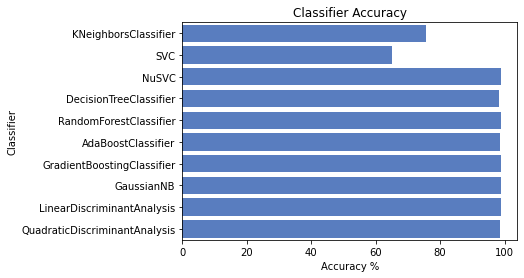

In [50]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()


In [51]:
test_data=test_data[X2.columns]
test_data.head()

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_closed,has_milestone
0,41.321520,-72.929423,0.2192,1.6795,0.0000,0.0000,5,3,2700000,0,...,0,1,1,1,0,0,1.3333,1,False,True
1,37.452084,-122.112879,7.5507,9.7534,11.0192,11.0192,1,3,62800000,1,...,0,0,0,0,0,1,6.0000,1,False,False
2,40.296222,-74.050972,1.3178,2.5534,4.0027,4.0027,4,2,8500000,1,...,0,0,0,1,1,0,2.0000,0,False,False
3,37.789268,-122.395184,0.7507,1.3315,1.0849,6.4986,8,2,2000000,4,...,0,0,1,0,0,0,1.0000,0,False,False
4,33.133240,-117.275027,8.9781,12.0658,0.0000,0.0000,4,2,80500000,0,...,0,0,0,0,1,1,5.5000,1,False,True


In [52]:
test_data[['funding_total_usd']]=scale.transform(test_data[['funding_total_usd']])
test_data.head()

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_closed,has_milestone
0,41.321520,-72.929423,0.2192,1.6795,0.0000,0.0000,5,3,0.000474,0,...,0,1,1,1,0,0,1.3333,1,False,True
1,37.452084,-122.112879,7.5507,9.7534,11.0192,11.0192,1,3,0.011018,1,...,0,0,0,0,0,1,6.0000,1,False,False
2,40.296222,-74.050972,1.3178,2.5534,4.0027,4.0027,4,2,0.001491,1,...,0,0,0,1,1,0,2.0000,0,False,False
3,37.789268,-122.395184,0.7507,1.3315,1.0849,6.4986,8,2,0.000351,4,...,0,0,1,0,0,0,1.0000,0,False,False
4,33.133240,-117.275027,8.9781,12.0658,0.0000,0.0000,4,2,0.014123,0,...,0,0,0,0,1,1,5.5000,1,False,True


In [53]:
test_data.shape[1]==X2.shape[1]

True

In [54]:
clf=RandomForestClassifier()
clf.fit(X2,y)

RandomForestClassifier()

In [55]:
preds=clf.predict(test_data)
res = ['acquired' if pred==1 else 'closed' for pred in preds]
# print(res)

In [57]:
res = pd.DataFrame(res)
res.index = test_data.index 
res.columns = ["prediction"]

res.to_csv("SampleSubmission.csv")
